### Librerias

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import glob

### Carga de datos

In [3]:
os.getcwd()
path_dataset1 = '..\\datosTransformados\\'

In [4]:
# vemos los .csv que tenemos que cargar
for files in glob.glob(path_dataset1 + "*.csv"):
    print(files)

..\datosTransformados\accesos.csv
..\datosTransformados\actividades.csv
..\datosTransformados\conocimientos.csv
..\datosTransformados\cursos.csv
..\datosTransformados\cursos_en_programas.csv
..\datosTransformados\itinerarios.csv
..\datosTransformados\notas_cursos.csv
..\datosTransformados\plantas.csv
..\datosTransformados\programas.csv
..\datosTransformados\roles.csv
..\datosTransformados\tutores_perfil.csv
..\datosTransformados\usuarios.csv


In [5]:
# Creamos una lista con los nombres de los dataframes 
lista = ['accesos','actividades', 'conocimientos', 'cursos', 'cursos_en_programas', 'itinerarios', 'notas_cursos', 'plantas', 'programas', 'roles', 'tutores_perfil', 'usuarios']
# Creamos un diccionario en blanco con los nombres de la lista como keys
dfs = {}
for i in lista:
    dfs[i] = ''

In [6]:
# get data file names
filenames = glob.glob(path_dataset1 + "*.csv")

# cargar dfs en el diccionario 
for i, valuei in enumerate(lista):
    for j, filename in enumerate(filenames):
        if i==j:
            dfs[valuei] = pd.read_csv(filename, index_col= [0])

In [7]:
# separar los keys del diccionario en df diferentes (con su nombre)

for i in dfs.keys():
    globals()['%s' % i.replace(" ", "_").lower()] = dfs[i]

In [8]:
#lista = ['usuarios','tutores_perfil', 'conocimientos', 'cursos', 'programas', 'cursos_en_programas', 'itinerarios', 'notas_cursos', 'roles', 'plantas', 'accesos', 'actividades']

# Gráficas descriptivas

### 1. Gráfico de barras apiladas: número usuarios por planta y idioma de configuracion de la plataforma

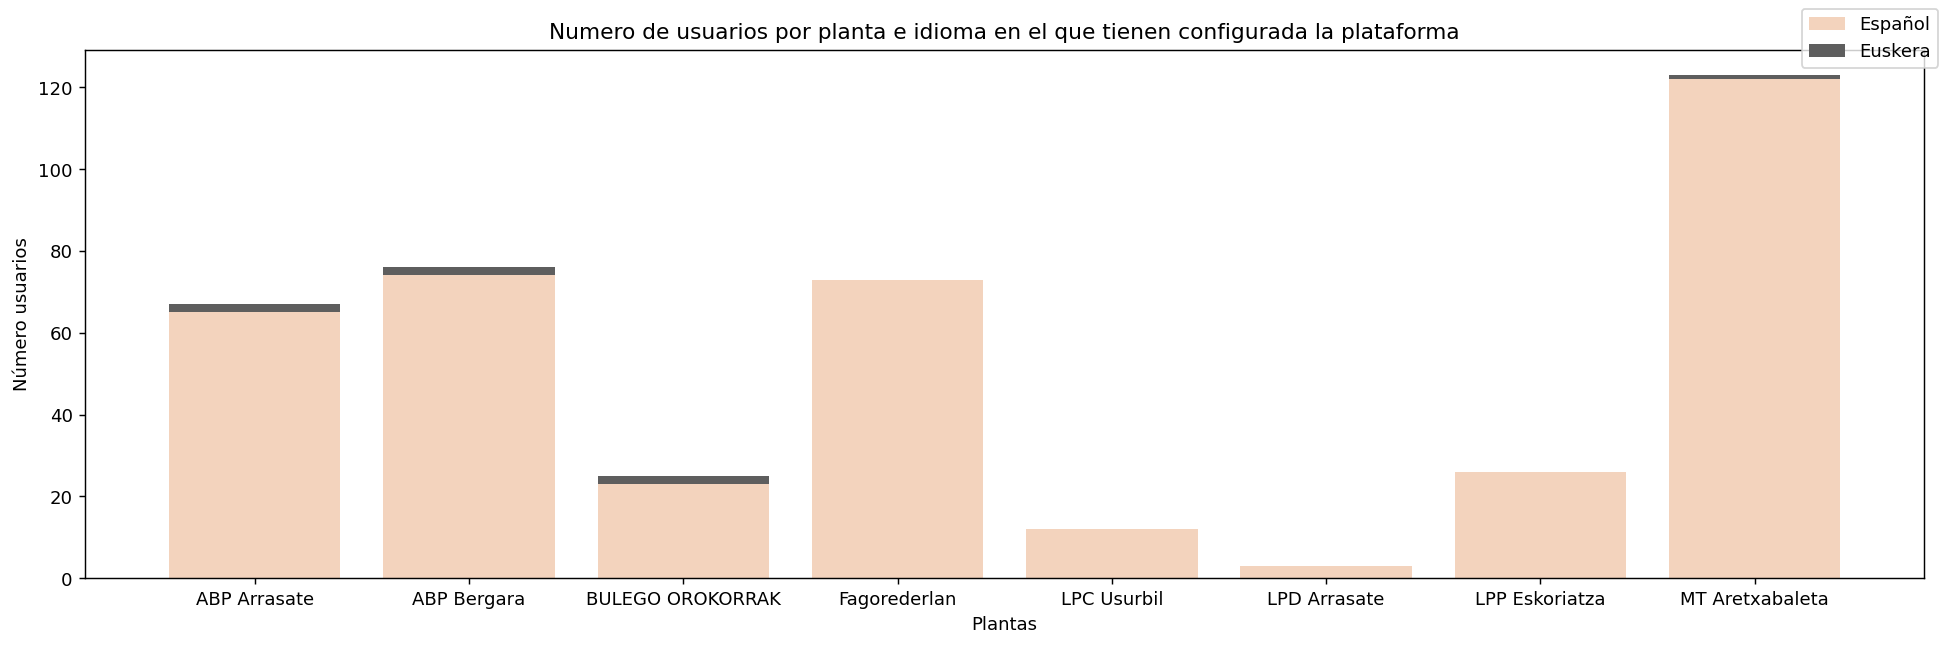

In [13]:
# Preparamos los datos: creamos dataframe donde las filas son las plantas, las columnas los idiomas, y los 
# valores la cantidad de usuarios que tienen configurada la plataforma en ese idioma
g_usuarios3 = usuarios.groupby(['planta_name', 'language']).count().reset_index()[['planta_name', 'language', 'user_id']]
g_usuarios3 = g_usuarios3.pivot_table(values='user_id', columns='language', index = 'planta_name')
g_usuarios3.reset_index(inplace=True)
g_usuarios3

# Creamos los objetos
fig, ax = plt.subplots()

# Grafico de barras mediante .bar()
ax.bar(g_usuarios3['planta_name'], g_usuarios3['es'], color='#F3D3BD')
ax.bar(g_usuarios3['planta_name'], g_usuarios3['eu'], bottom=g_usuarios3['es'], color='#5E5E5E')
fig.legend(["Español", "Euskera"])

#ejes
ax.set(xlabel= 'Plantas', ylabel = 'Número usuarios')
ax.set_title('Numero de usuarios por planta e idioma en el que tienen configurada la plataforma')

#formato figura
fig.set_size_inches(15,5)
fig.set_dpi(130)
fig.tight_layout()

#guardarlo en la carpeta graficos
plt.savefig("..\\gráficos\\grafico1_usuarios.png")


### 2. Gráfico de tarta: Roles de los usuarios

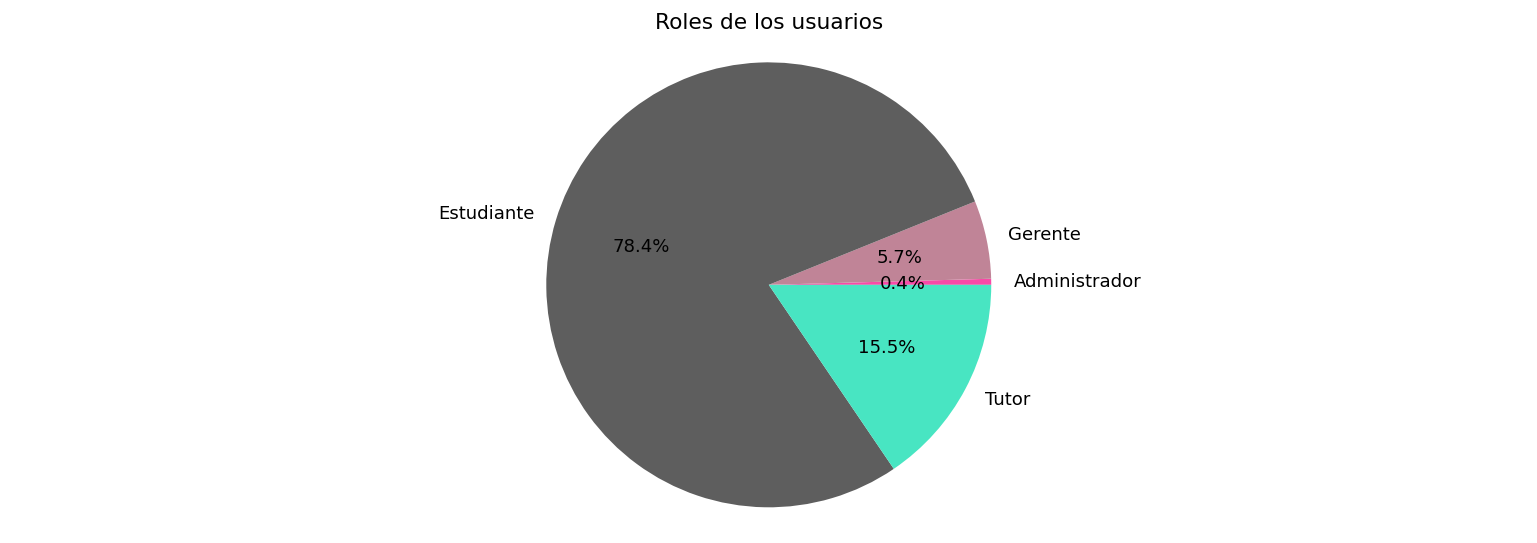

In [25]:
#Preparamos los datos: como son 4 variables diferentes, hacemos el recuento en un dataframe nuevo
g_usuarios2 = pd.DataFrame()
g_usuarios2.loc['role_admin','count'] = usuarios[usuarios['role_admin'] == True]['role_admin'].count()
g_usuarios2.loc['role_manager','count'] = usuarios[usuarios['role_manager'] == True]['role_manager'].count()
g_usuarios2.loc['role_student','count'] = usuarios[usuarios['role_student'] == True]['role_student'].count()
g_usuarios2.loc['role_tutor','count'] = usuarios[usuarios['role_tutor'] == True]['role_tutor'].count()
g_usuarios2.reset_index(inplace=True)

# Creamos los objetos
fig, ax = plt.subplots()

# Pie
ax.pie(list(g_usuarios2['count']), labels= ['Administrador', 'Gerente','Estudiante','Tutor'],autopct='%1.1f%%', colors= ['#F84AA7','#c08497','#5E5E5E', '#48E5C2'] )
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Titulo y nombre de ejes
ax.set_title('Roles de los usuarios')

# Cambiamos tamaño y densidad
fig.set_size_inches(15,5)
fig.set_dpi(130)

#guardarlo en la carpeta graficos
plt.savefig("..\\gráficos\\grafico2_usuarios.png")

### 3. Gráfico de barras: diferentes perfiles de los tutores

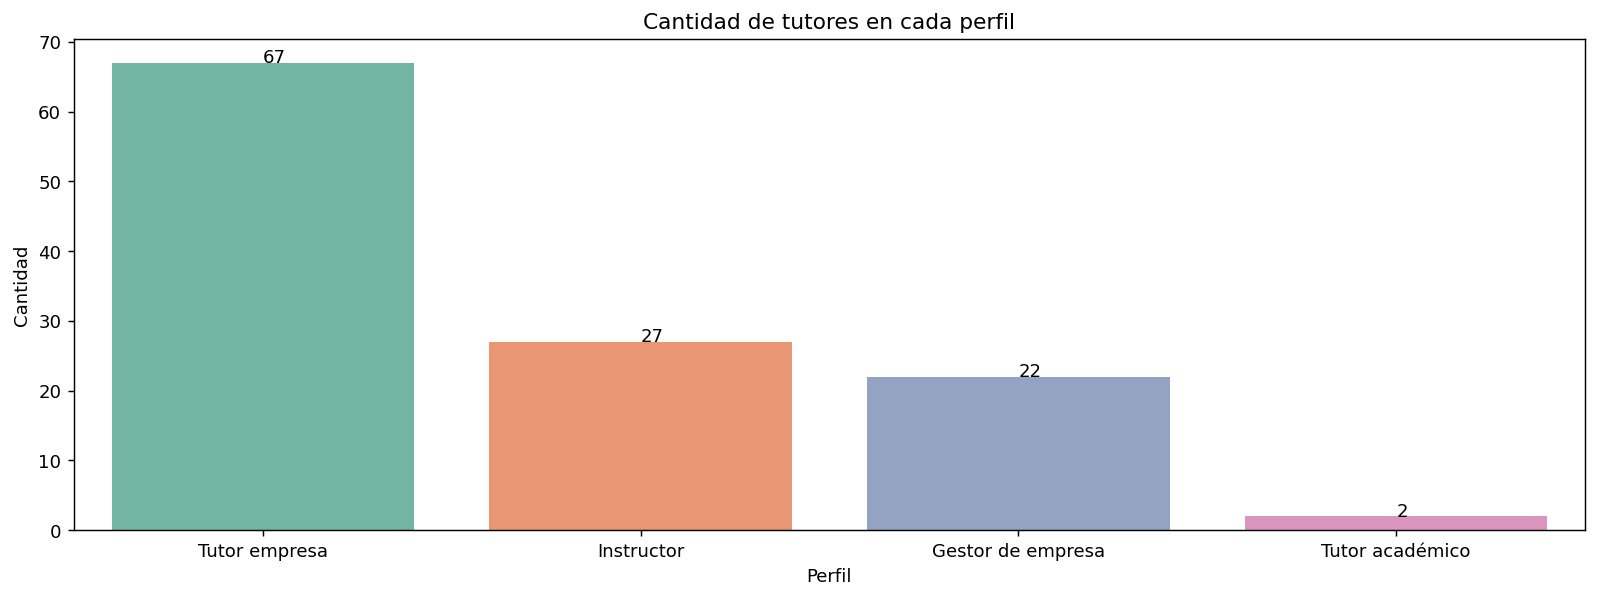

In [12]:

tutores_perfil_count = tutores_perfil['perfil_name'].value_counts().to_frame().reset_index()

# Objetos
fig, ax = plt.subplots()

# Grafico de barras
sns.barplot(ax = ax, x = "index", y = "perfil_name", data = tutores_perfil_count , palette = "Set2" )
#ejes
ax.set(xlabel = 'Perfil' , ylabel = 'Cantidad')

# funcion para agregar etiquetas de valores
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x = tutores_perfil_count['index'], y = tutores_perfil_count['perfil_name'])

# Formato
fig.set_size_inches(15,5)
fig.set_dpi(130)

ax.set_title("Cantidad de tutores en cada perfil")

#guardarlo en la carpeta graficos
plt.savefig("..\\gráficos\\grafico3_tutoresperfil.png")

### 4. Gráfico de barras: los cursos más populares y largos y programas mas populares

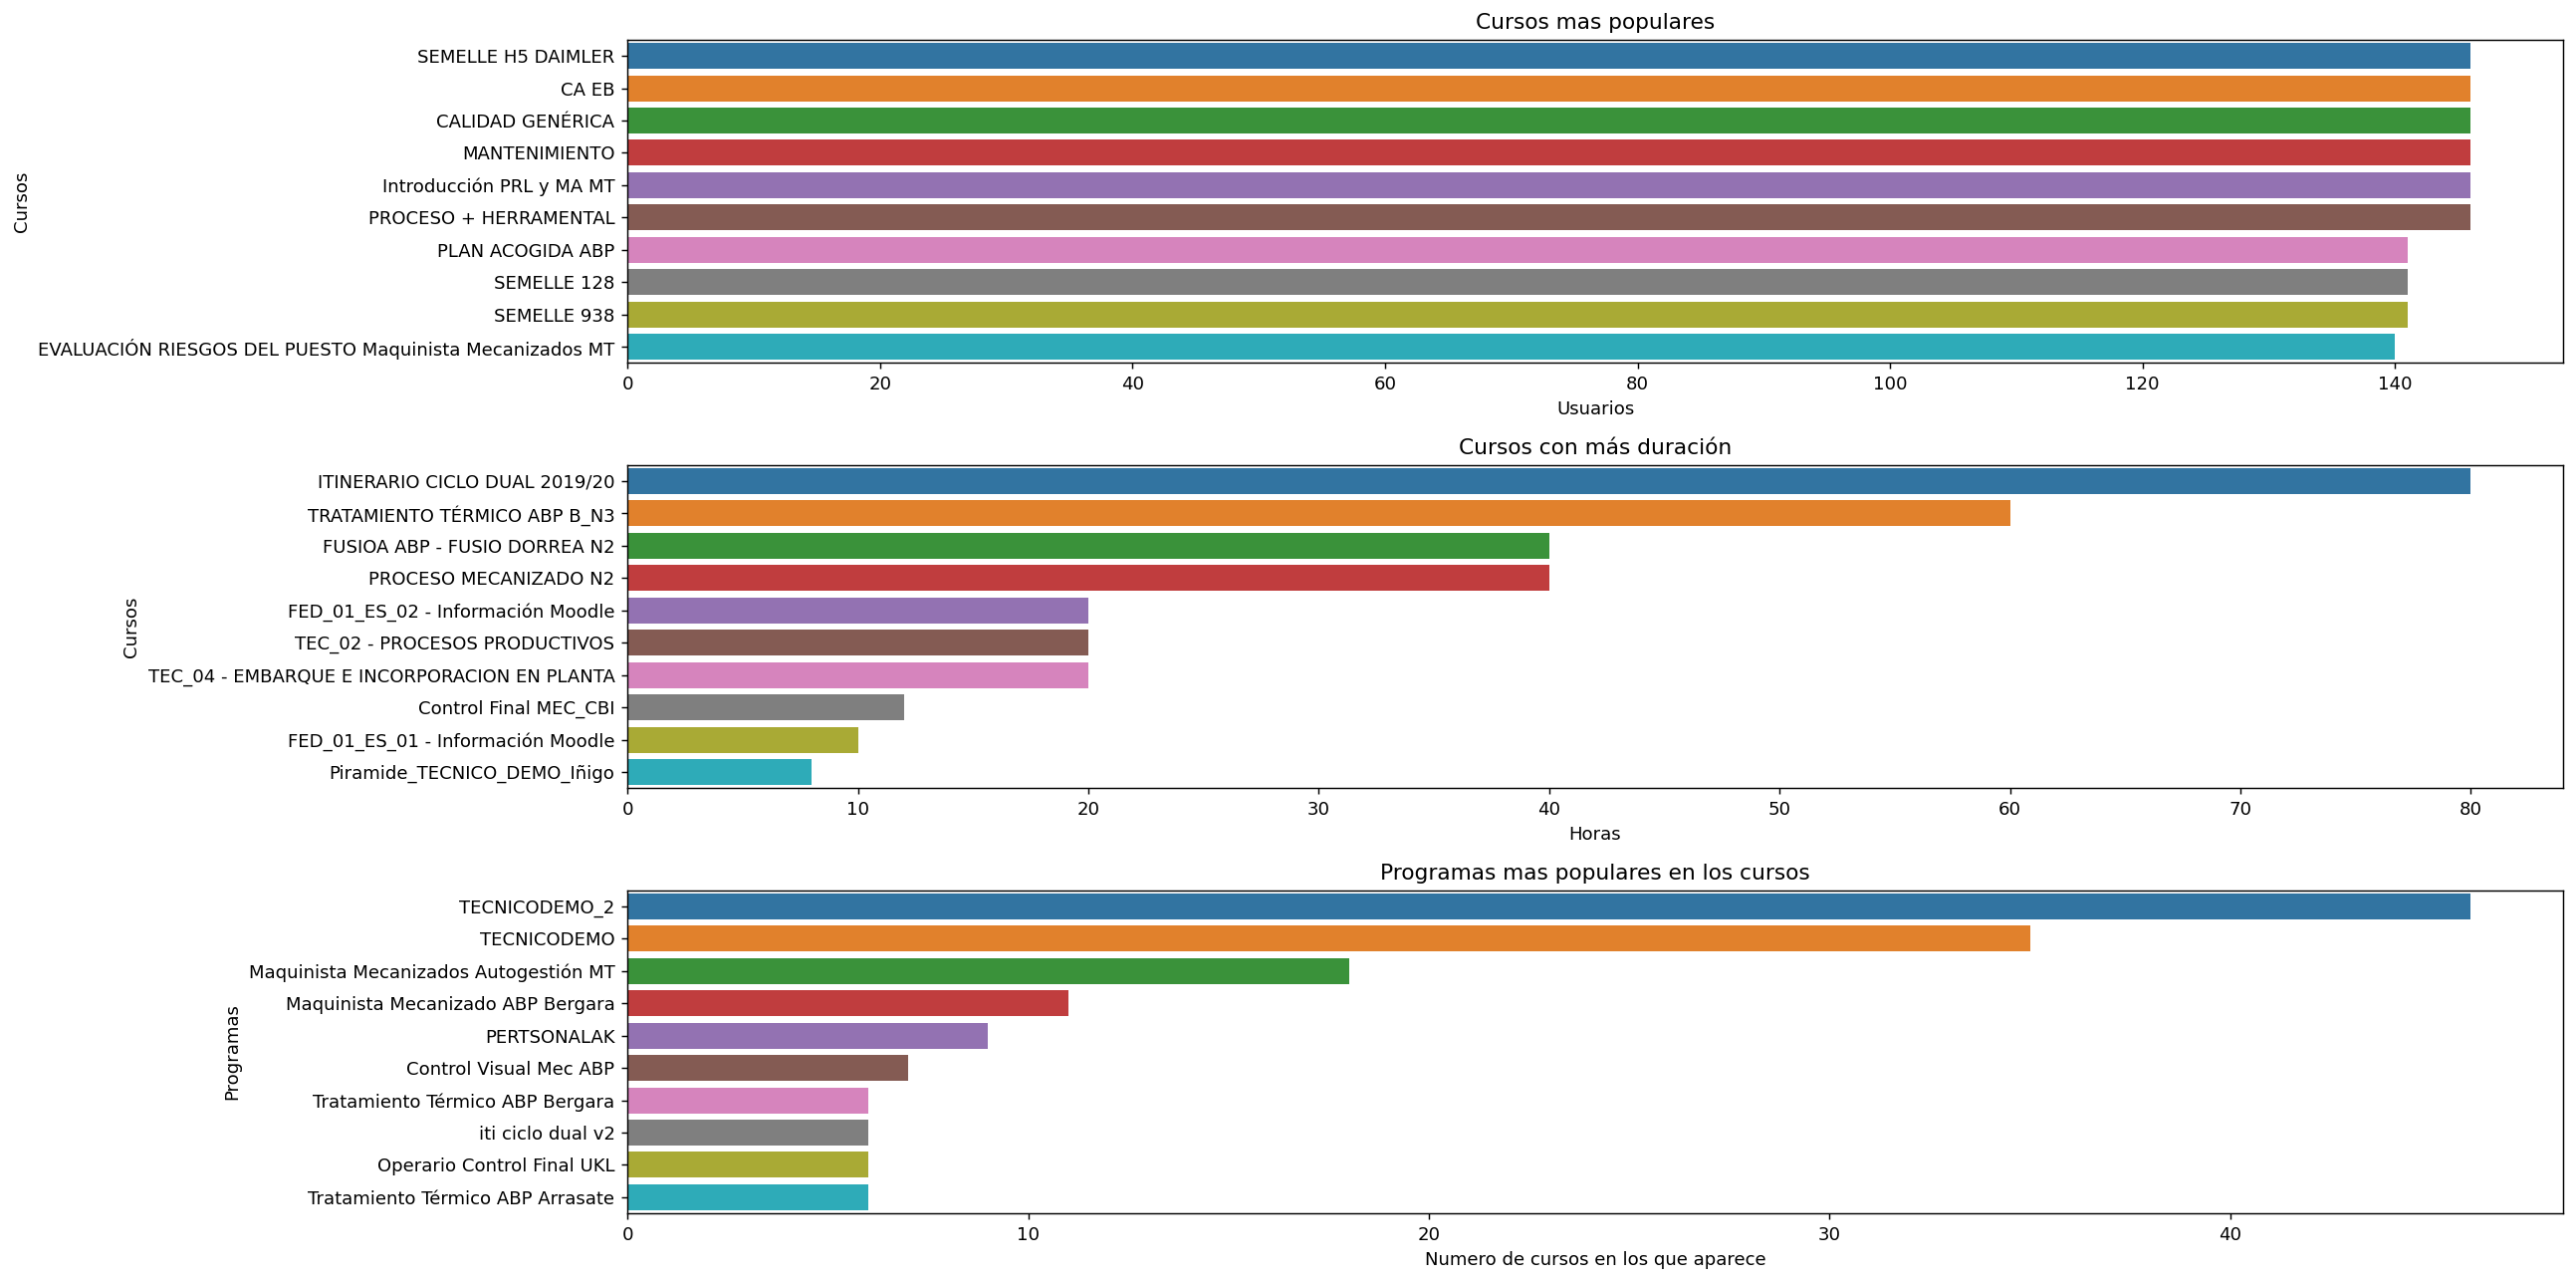

In [27]:
#Preparamos los datos: los cursos que mas aparecen en notas_cursos, es decir, los mas realizados y por tanto populares
cursos_popu = notas_cursos['course_name'].value_counts().to_frame().reset_index().head(10)
#Cursos con mas duracion; los que mas horas tienen en "cursos"
cursos_largos = cursos[['course_name', 'hours']].sort_values(by = 'hours',ascending=False).reset_index(drop=True).head(10)
#los programas que mas aparecen en los cursos (cursos_en_programas), es decir, los mas realizados y por tanto populares
programas_popu = cursos_en_programas['program_name'].value_counts().to_frame().reset_index().head(10)

# Objetos
fig, ax = plt.subplots(3,1)

# Grafico de barras
sns.barplot(ax = ax[0], x = "course_name", y = "index", data = cursos_popu , palette = "tab10")
#ejes
ax[0].set(xlabel = 'Usuarios' , ylabel = 'Cursos')
ax[0].set_title("Cursos mas populares")

# Segundo grafico de barras
sns.barplot(ax = ax[1], x = "hours", y = "course_name", data = cursos_largos , palette = "tab10")
#ejes
ax[1].set(xlabel = 'Horas' , ylabel = 'Cursos')
ax[1].set_title("Cursos con más duración")

#Tercer gráfico de barras
sns.barplot(ax = ax[2], x = "program_name", y = "index", data = programas_popu , palette = "tab10")
#ejes
ax[2].set(xlabel = 'Numero de cursos en los que aparece' , ylabel = 'Programas')
ax[2].set_title("Programas mas populares en los cursos")

# Formato
fig.set_size_inches(20,10)
fig.set_dpi(130)
fig.tight_layout()

#guardarlo en la carpeta graficos
plt.savefig("..\\gráficos\\grafico4_cursos.png")


### 5. Grafico de barras: distintos conocimientos

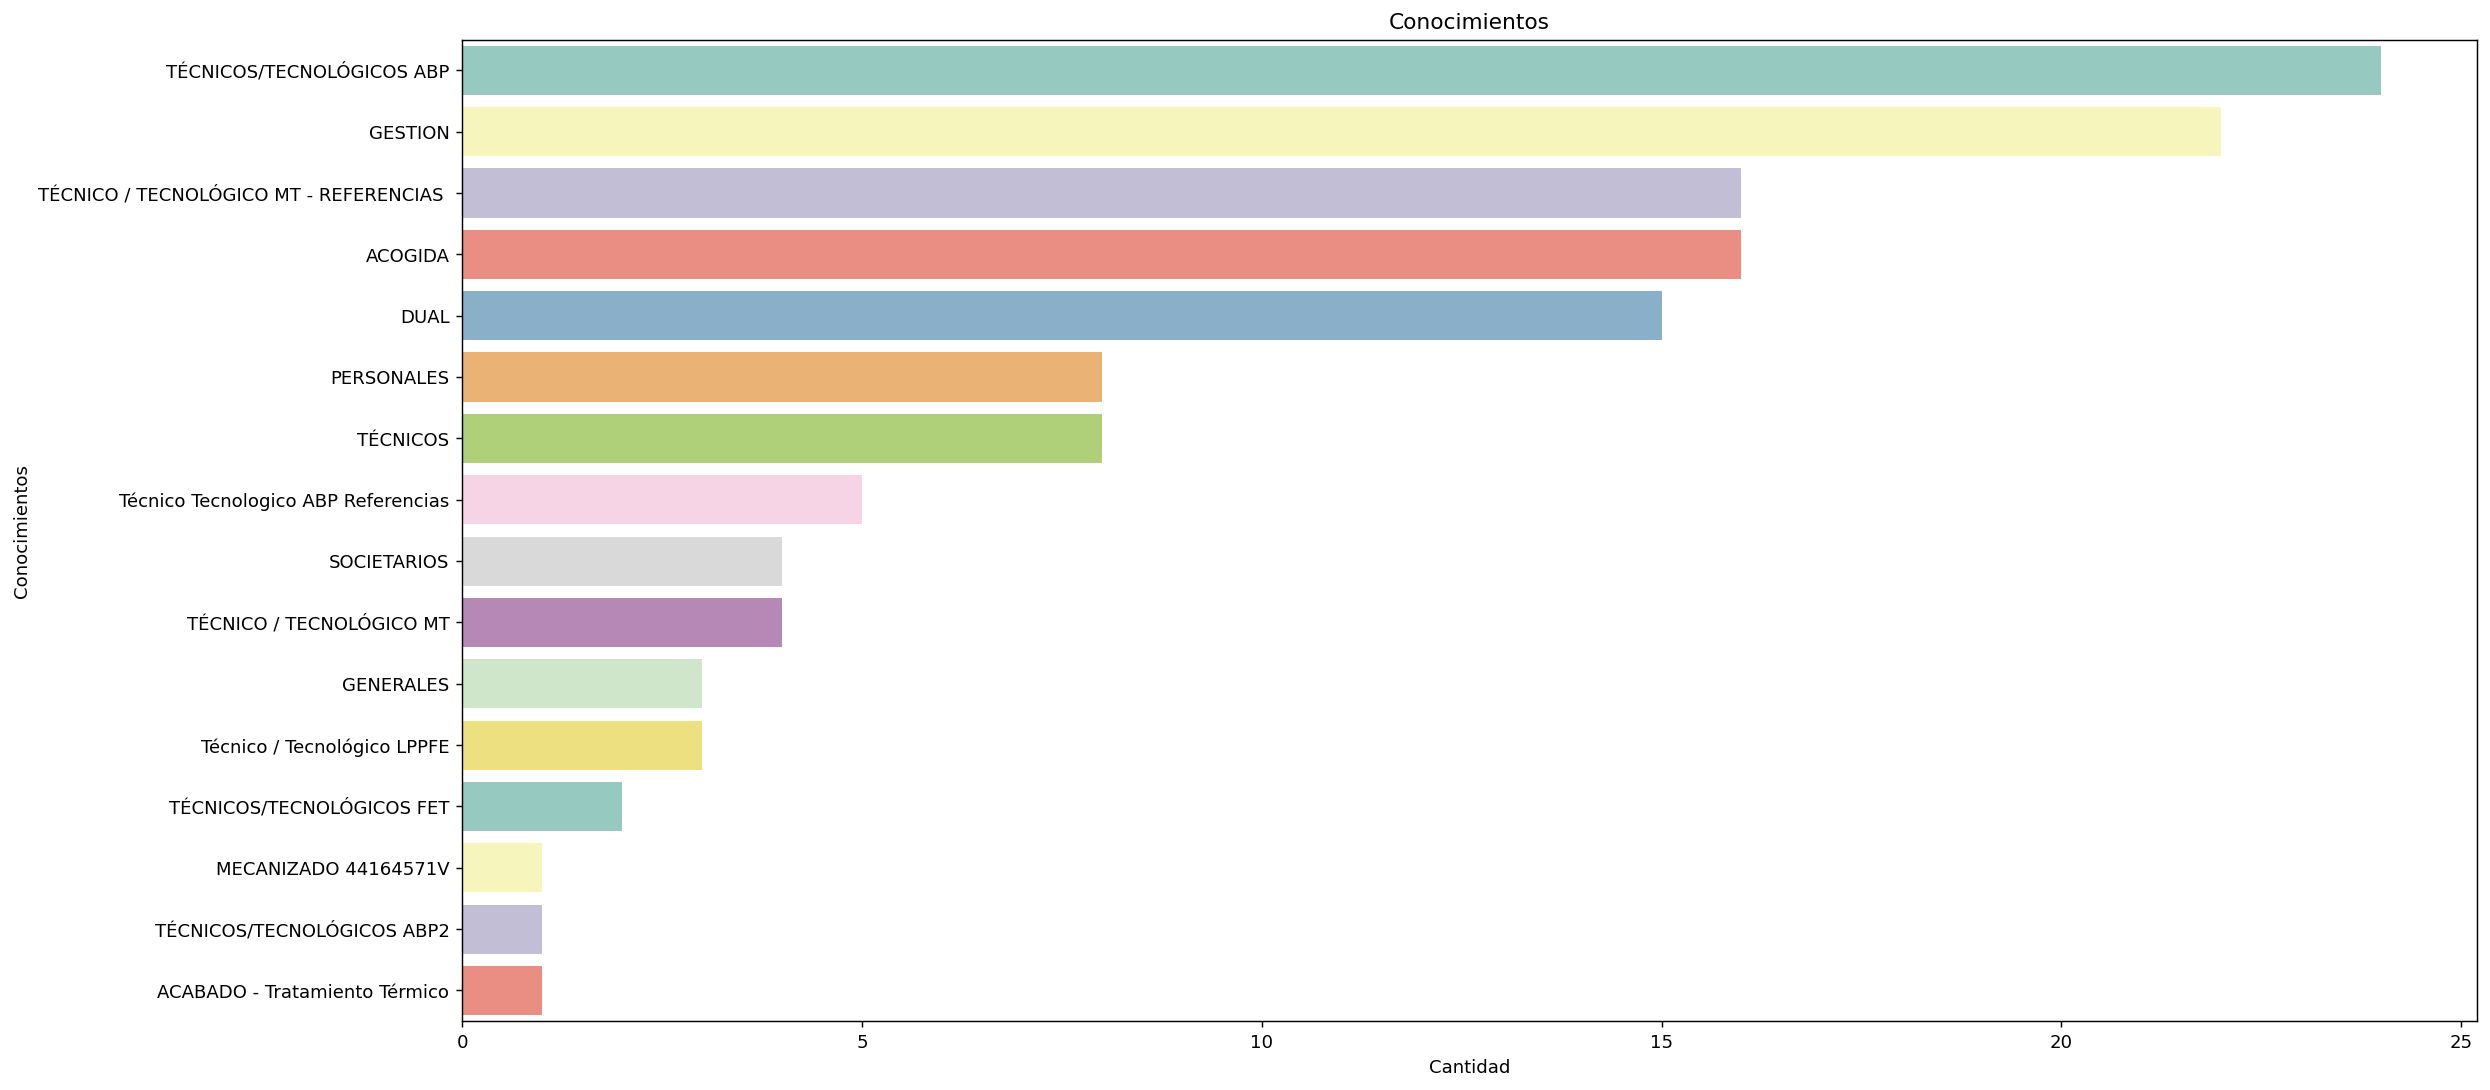

In [28]:
categorias_count = conocimientos['categoria_conocimiento_name'].value_counts().to_frame().reset_index()

# Objetos
fig, ax = plt.subplots()

# Grafico de barras
sns.barplot(ax = ax, x = "categoria_conocimiento_name", y = "index", data = categorias_count , palette = "Set3" )
#ejes
ax.set(xlabel = 'Cantidad' , ylabel = 'Conocimientos')
# Formato
fig.set_size_inches(20,10)
fig.set_dpi(130)
ax.set_title("Conocimientos")

#guardarlo en la carpeta graficos
plt.savefig("..\\gráficos\\grafico5_conocimientos.png")

### 6. Grafico de líneas: fecha inicio y fecha final de los programas

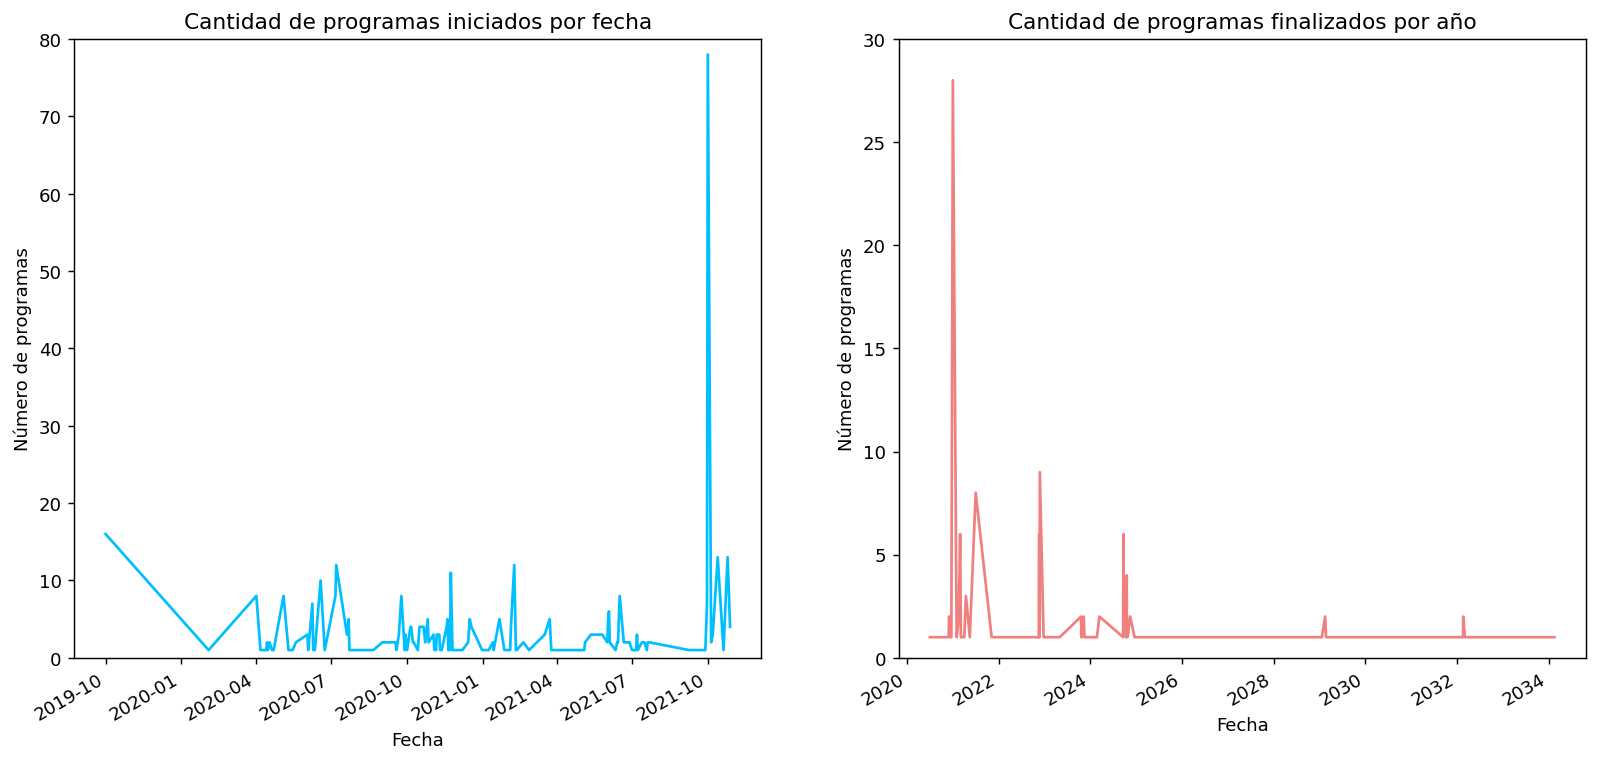

In [14]:
# Preparamos los datos: indicamos en cada fecha la cantidad de cursos que se inician
itinerarios['date_enroll'] = pd.to_datetime(itinerarios['date_enroll'] , utc= True )
itinerarios['enroll_end'] = pd.to_datetime(itinerarios['enroll_end'], utc= True ) 
it_d = itinerarios.date_enroll.value_counts().to_frame().reset_index()
it_e = itinerarios.enroll_end.value_counts().to_frame().reset_index()

fig, ax= plt.subplots(1,2)

#grafico linea
sns.lineplot(ax = ax[0] , x = 'index' , y = 'date_enroll' , data = it_d, color= 'deepskyblue')

#segundo grafico de linea
sns.lineplot(ax = ax[1] , x = 'index' , y = 'enroll_end' , data = it_e, color= 'lightcoral')

#autoformato fechas
ax[0].figure.autofmt_xdate()
ax[1].figure.autofmt_xdate()

#formato figura
fig.set_size_inches(15,7)
fig.set_dpi(130)

# Limitamos los ejes
ax[0].set_ylim(0, 80)
ax[1].set_ylim(0, 30)

#nombre ejes
ax[0].set(xlabel = 'Fecha' , ylabel = 'Número de programas' , title = 'Cantidad de programas iniciados por fecha')
ax[1].set(xlabel = 'Fecha' , ylabel = 'Número de programas' , title = 'Cantidad de programas finalizados por año')

#guardarlo en la carpeta graficos
plt.savefig("..\\gráficos\\grafico6_itinerarios.png")

### 7. Gráfico de barras: cursos con mejores y peores notas

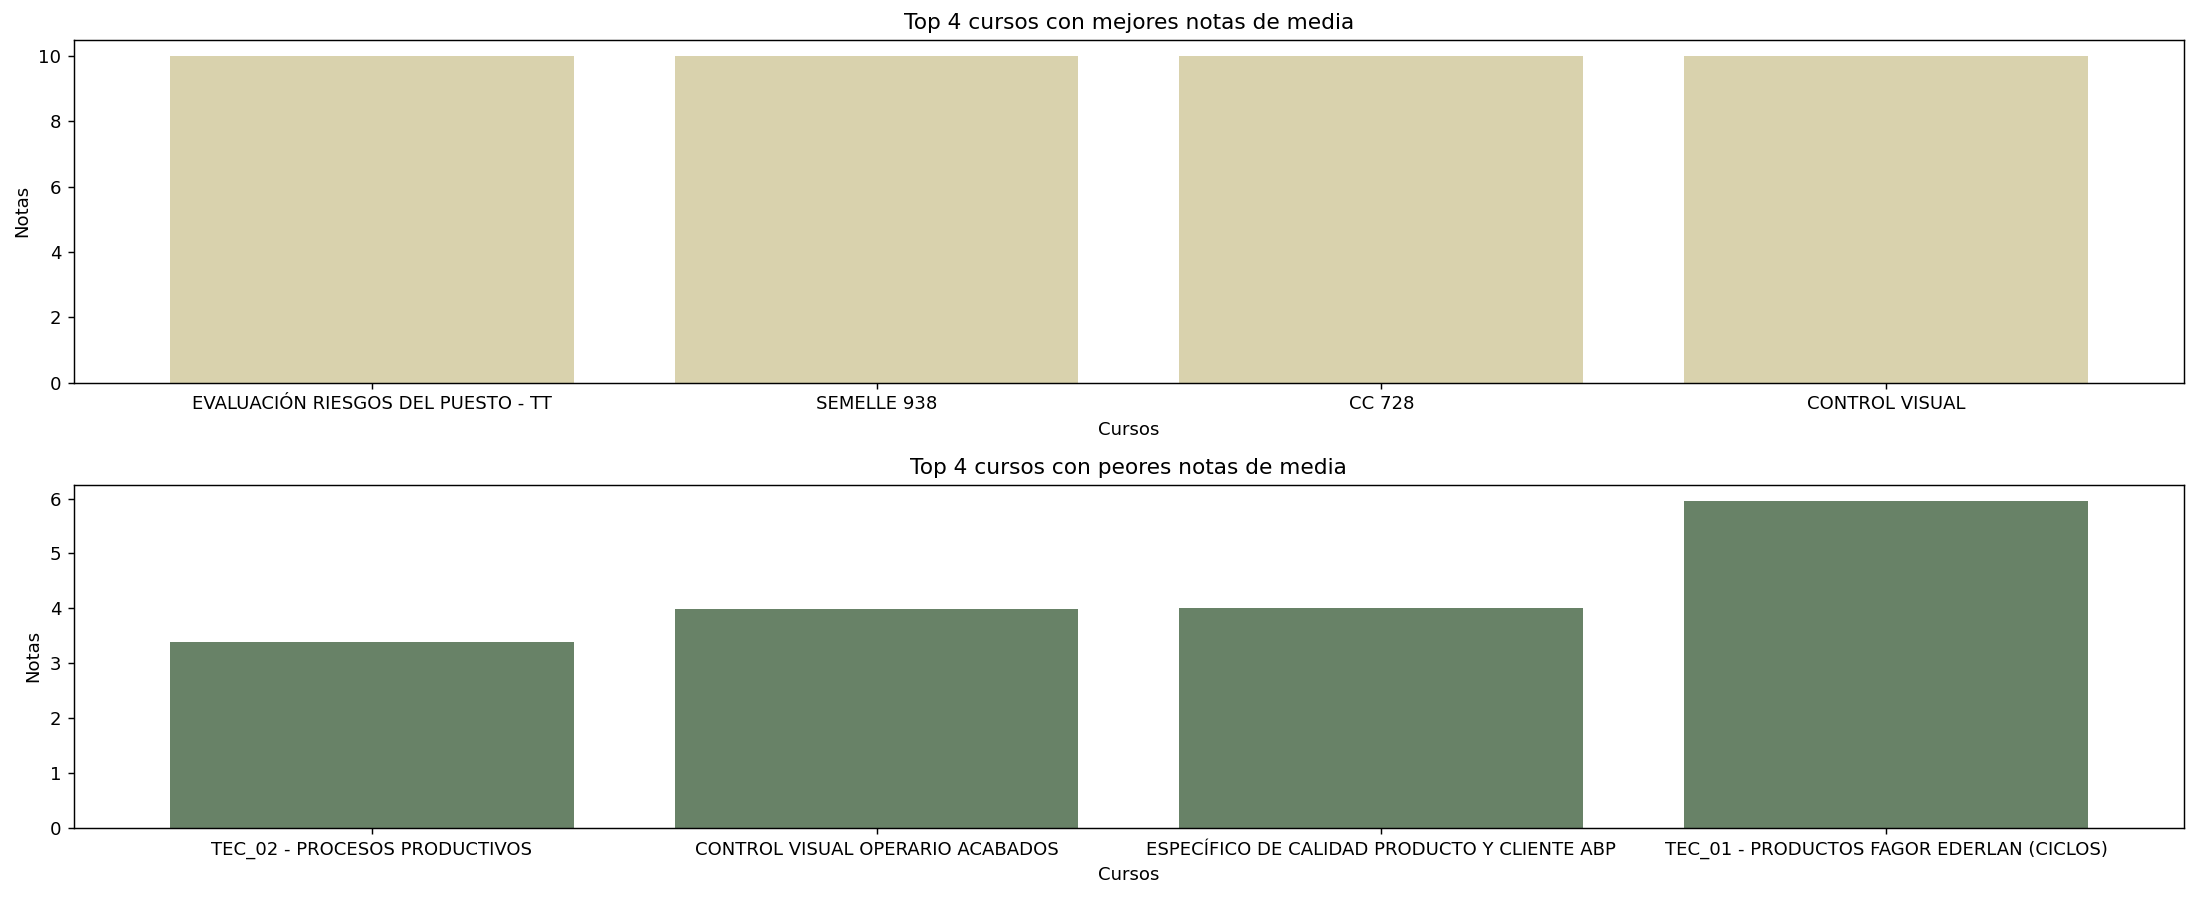

In [30]:
#preparamos los datos
notas_cursos= notas_cursos[notas_cursos['grade']!= 0]
g_notas = notas_cursos[['grade', 'course_name']].groupby('course_name').mean().sort_values(by = 'grade',ascending= False).reset_index().head(4)
g_notas1 = notas_cursos[['grade', 'course_name']].groupby('course_name').mean().sort_values(by = 'grade',ascending= True).reset_index().head(4)

# Creamos los objetos
fig7, ax7 = plt.subplots(2,1)

# Grafico de barras mediante .bar()
ax7[0].bar(g_notas['course_name'],g_notas['grade'], color = '#CDC392', alpha = 0.75)
ax7[1].bar(g_notas1['course_name'],g_notas1['grade'], color = '#355834', alpha = 0.75)

# Titulo y nombre de ejes
ax7[0].set_title('Top 4 cursos con mejores notas de media')
ax7[0].set_xlabel('Cursos')
ax7[0].set_ylabel('Notas')

ax7[1].set_title('Top 4 cursos con peores notas de media')
ax7[1].set_xlabel('Cursos')
ax7[1].set_ylabel('Notas')

# Cambiamos tamaño y densidad
fig7.set_size_inches(17,7)
fig7.set_dpi(130)
fig7.tight_layout()

#guardarlo en la carpeta graficos
plt.savefig("..\\gráficos\\grafico7_notas.png")



### 8. Gráfico de dispersión: relación entre notas y num de accesos y progreso online

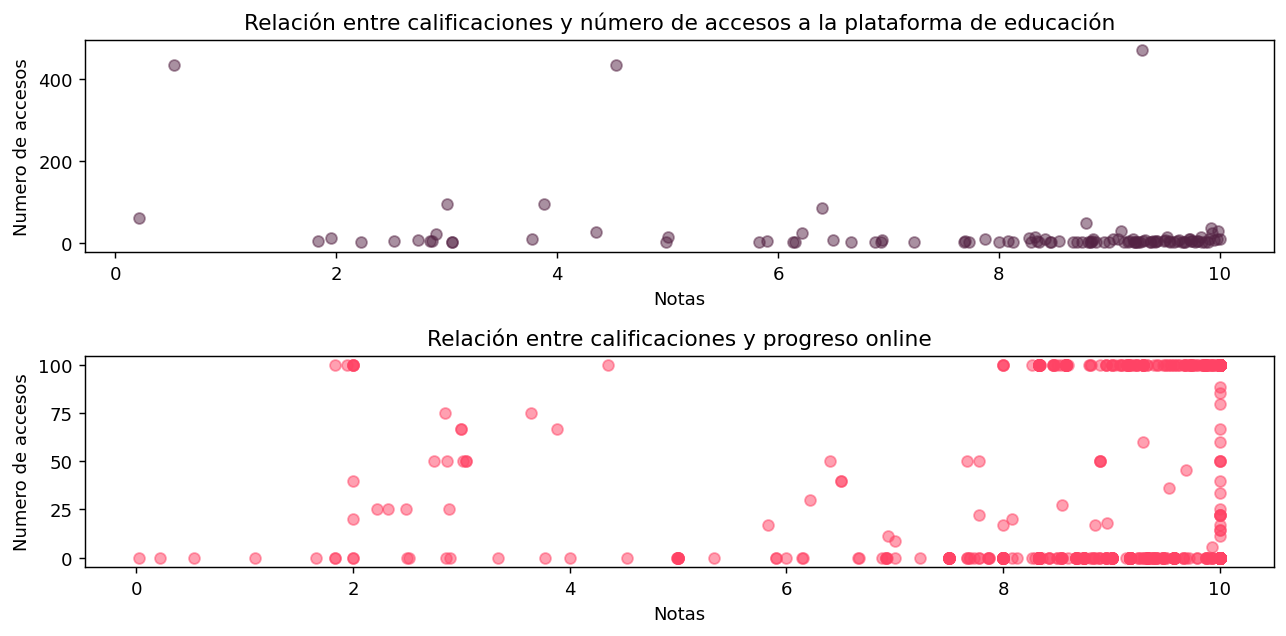

In [31]:
#preparamos los datos
df1 = notas_cursos[['user_id', 'grade']].groupby('grade').mean().reset_index()
df1['user_id']= df1['user_id'].astype('int64')
df2=accesos['user_id'].value_counts().to_frame().reset_index().rename(columns={'index': 'user_id', 'user_id': 'count'})
df3 = pd.merge(df1, df2, on='user_id')
df3

# Creamos objetos
fig10, ax10 = plt.subplots(2,1)

# Función .scatter()
ax10[0].scatter(df3['grade'], df3['count'], color = '#542344', alpha = 0.5)
ax10[1].scatter(notas_cursos['grade'], notas_cursos['online_progress'], color = '#FF4365', alpha = 0.5)

# Titulo y nombre a los ejes
ax10[0].set_title('Relación entre calificaciones y número de accesos a la plataforma de educación')
ax10[0].set_xlabel('Notas')
ax10[0].set_ylabel('Numero de accesos')

ax10[1].set_title('Relación entre calificaciones y progreso online')
ax10[1].set_xlabel('Notas')
ax10[1].set_ylabel('Numero de accesos')

# Formato de la figura
fig10.set_size_inches(10,5)
fig10.set_dpi(130)
fig10.tight_layout()

#guardarlo en la carpeta graficos
plt.savefig("..\\gráficos\\grafico8_notas.png")

### 9. Violin plot: notas en cursos y en actividades

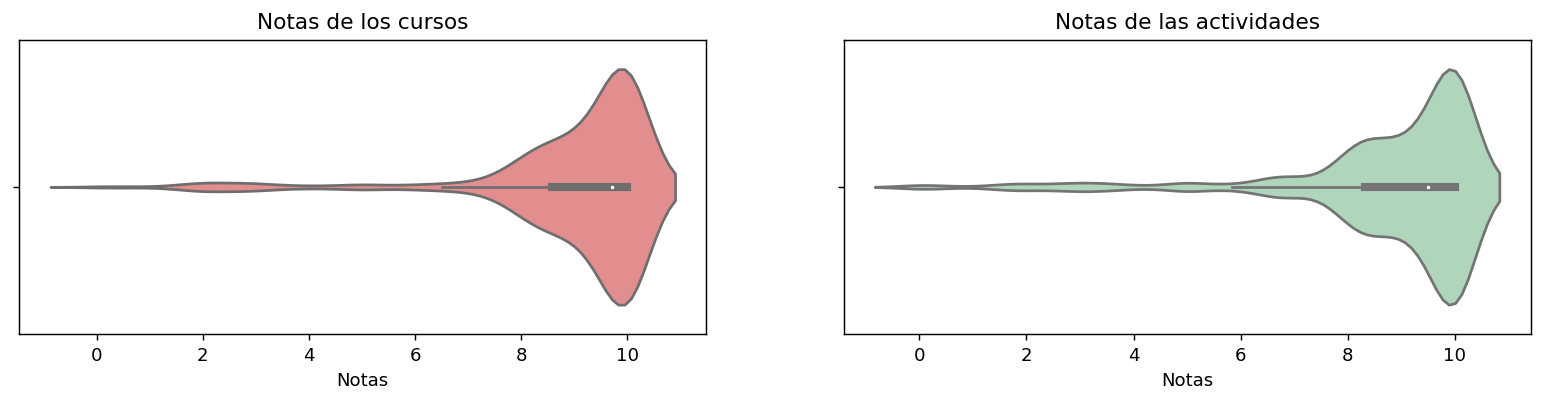

In [32]:
# Objetos.
fig, ax = plt.subplots(1,2)

# Histograma.
sns.violinplot(ax = ax[0], x = "grade", data = notas_cursos, color='lightcoral')
sns.violinplot(ax = ax[1], x = "grade", data = actividades, color='#A9DBB8')

#ejes
ax[0].set(xlabel= 'Notas')
ax[0].set_title('Notas de los cursos')

ax[1].set(xlabel= 'Notas')
ax[1].set_title('Notas de las actividades')

# Formato figura.
fig.set_size_inches(15, 3)
fig.set_dpi(130)

#guardarlo en la carpeta graficos
plt.savefig("..\\gráficos\\grafico9_notas.png")

### 10. Gráfico de línea: Evolución de las notas de las actividades en el tiempo

<ipython-input-55-0a49f929db46>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_nuevo['time'] = g_nuevo['time'].dt.strftime('%Y-%m')
<ipython-input-55-0a49f929db46>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_nuevo['time'] = pd.to_datetime(g_nuevo['time'], format= '%Y-%m', utc = True).reset_index(drop=True)


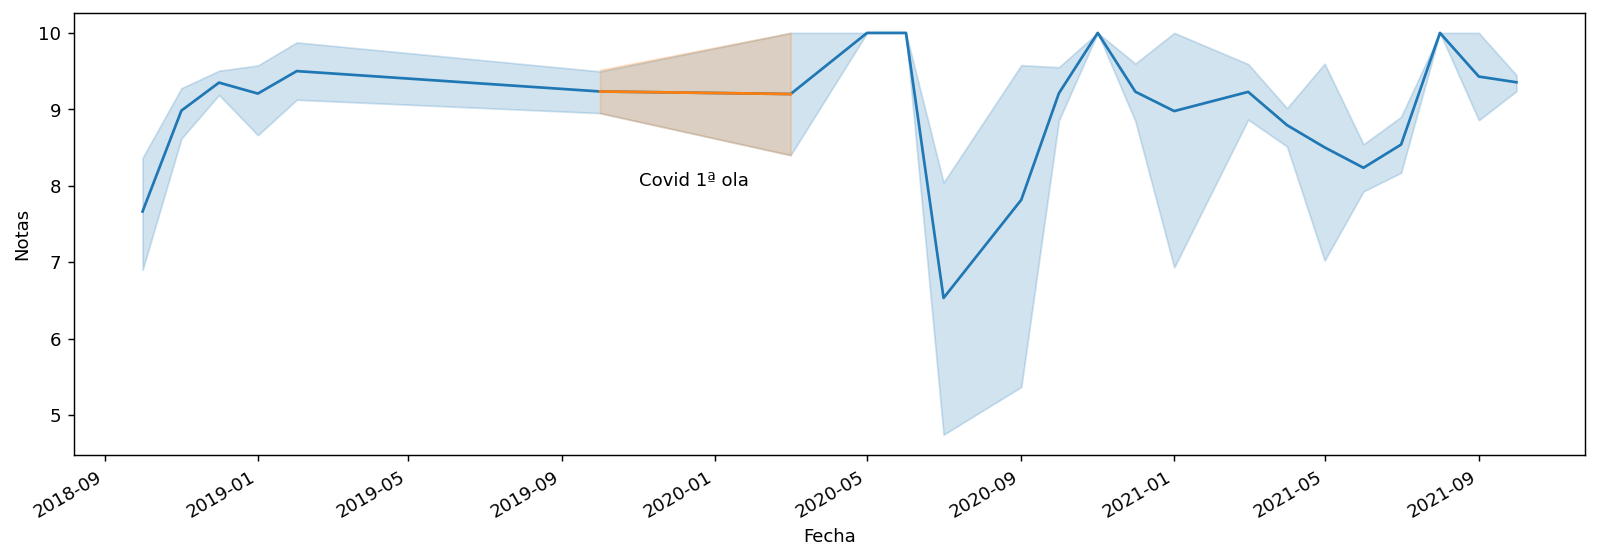

In [55]:
#Preparamos los datos: fecha y notas
actividades['time'] = pd.to_datetime(actividades['time'], utc= True) #a tipo datetime
actividades.fillna(0, inplace= True)
actividades = actividades[actividades['time'] != 0] 
actividades = actividades.sort_values(ascending=True, by= 'time')
g_nuevo = actividades[['time', 'grade', 'course_category_id']]
g_nuevo['time'] = g_nuevo['time'].dt.strftime('%Y-%m')
g_nuevo['time'] = pd.to_datetime(g_nuevo['time'], format= '%Y-%m', utc = True).reset_index(drop=True)
g_nuevo = g_nuevo.sort_values(ascending=True, by = 'time')

cuarentena = g_nuevo[(g_nuevo['time'] > '2019-09-01') & (g_nuevo['time'] < '2020-05-01')]

#objetos
fig, ax = plt.subplots()

#Grafico
sns.lineplot(ax = ax, x = 'time', y = 'grade', data = g_nuevo)
sns.lineplot(ax = ax, x = 'time', y = 'grade', data = cuarentena)

#nombre de ejes
ax.set(xlabel = 'Fecha', ylabel = 'Notas')

#autoformato fechas
ax.figure.autofmt_xdate()

#Anotaciones
ax.annotate('Covid 1ª ola', xy = [pd.to_datetime('2019-11', format= '%Y-%m', utc = True), 8])

#formato figura
fig.set_size_inches(15,5)
fig.set_dpi(130)

#guardarlo en la carpeta graficos
plt.savefig("..\\gráficos\\grafico10_notas.png")